In [1]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
#Import and merge Data filles
Destfilepath = os.path.join('data', 'clean','LAX_Dest_Flight_Delays_2016.csv')
Originfilepath = os.path.join('data', 'clean','LAX_Origin_Flight_Delays_2016.csv')
file=pd.read_csv(Destfilepath)
file1=pd.read_csv(Originfilepath)
frames = [file,file1]
result = pd.concat(frames,ignore_index=True)

In [3]:
#Creating Variables
total_delay=0
total_flight=len(result)
airlines=list(result['CarrierName'].unique())
total_carrier_delay={"Flights": {},
                    "Delays": {}}

In [4]:
#Caluclate total flights and delays per carrier
for index,row in result.iterrows():
    #print(row['CarrierName'])
    total_carrier_delay['Flights'][row['CarrierName']] =  total_carrier_delay['Flights'].get(row['CarrierName'], 0) + 1
    if (row['Origin']=='LAX' and row['DepDelayMinutes']>0) or (row['Dest']=='LAX' and row['ArrDelayMinutes']>0):
        total_delay = total_delay+1
        total_carrier_delay['Delays'][row['CarrierName']] =  total_carrier_delay['Delays'].get(row['CarrierName'], 0) + 1

In [138]:
#Creating DataFrame of total flights and delays
total_airline_delay=pd.DataFrame(columns=["Airline","Total Flights","Total Delays"])


for index, key in enumerate(total_carrier_delay['Flights']):
    total_airline_delay.loc[index] = [key, total_carrier_delay['Flights'][key], total_carrier_delay['Delays'][key] ]


total_airline_delay['% Delays']=total_airline_delay['Total Delays']/total_airline_delay['Total Flights'] * 100
total_airline_delay['% Delays'] = total_airline_delay['% Delays'].map("{:.0f}".format)
total_airline_delay=total_airline_delay.drop(labels=index)
total_airline_delay=total_airline_delay.sort_values('% Delays',ascending=True)
total_airline_delay

,Airline,Total Flights,Total Delays,% Delays
1,Alaska Airlines Inc.,17527,5247,30
5,Hawaiian Airlines Inc.,3536,1189,34
7,SkyWest Airlines Inc.,49608,18417,37
4,Frontier Airlines Inc.,3422,1293,38
0,American Airlines Inc.,82034,33548,41
2,JetBlue Airways,10225,4353,43
6,Spirit Air Lines,17416,7451,43
3,Delta Air Lines Inc.,71049,31158,44
8,United Air Lines Inc.,56522,25090,44
9,Virgin America,27886,12739,46


In [177]:
#Total Percentage of delay in LAX
percentage_delay = round((total_delay/total_flight)*100)
airport_df=pd.DataFrame(columns=["Airline","Total Flights","Total Delays"])
airport_df=pd.DataFrame({'Airline':['LAX'],
                       'Total Flights':[total_flight],
                       'Total Delays':[total_delay],
                       '% Delays':[percentage_delay]})
airport_df=airport_df[["Airline","Total Flights","Total Delays","% Delays"]]

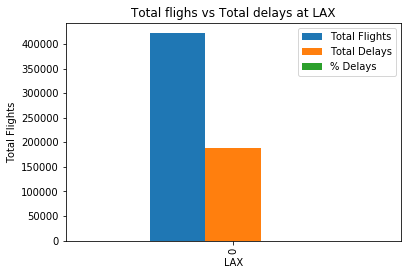

,Airline,Total Flights,Total Delays,% Delays
0,LAX,421854,188979,45


In [178]:
#Plot for total flight vs delay in LAX
airport_df.plot.bar()
plt.xlabel('LAX')
plt.ylabel('Total Flights')
plt.title('Total flighs vs Total delays at LAX')
plt.show()
airport_df

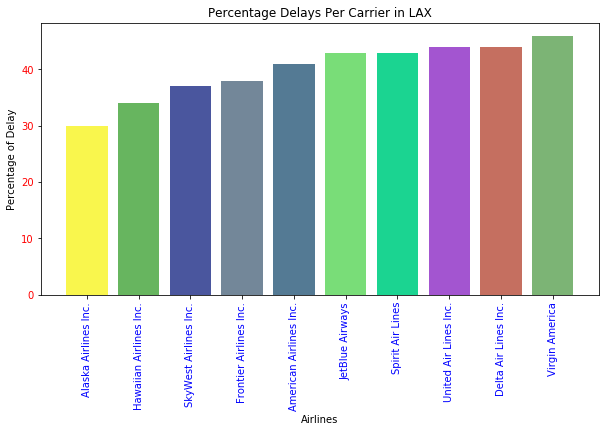

In [182]:
# Set x axis and tick locations
x_axis = np.arange(len(total_airline_delay))
tick_locations = [value for value in x_axis]

total_airline_delay=total_airline_delay.sort_values('% Delays',ascending=True)
plt.figure(figsize=(10,5))
plt.bar(x_axis,total_airline_delay['% Delays'],align='center',alpha=0.9,color=np.random.rand(20,3))#label=total_airline_delay["Airline"]
plt.xticks(tick_locations, total_airline_delay["Airline"], rotation="vertical",color='b')
plt.yticks(color='r')
# plt.legend()
plt.ylabel('Percentage of Delay')
plt.xlabel('Airlines')
plt.title('Percentage Delays Per Carrier in LAX')
# total_airline_delay['Airline'].plt.bar()
plt.show()

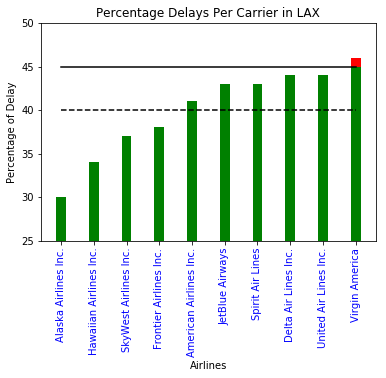

In [154]:
# some example data
values = np.array(total_airline_delay['% Delays']).astype(np.float)
x = range(len(total_airline_delay['Airline']))
thershold=40

# split it up
above_avg_delay = np.maximum(values - float(percentage_delay), 0)
below_avg_delay = np.minimum(values, float(percentage_delay))

# # and plot it
fig, ax = plt.subplots()

ax.bar(x, below_avg_delay, 0.3, color="green")
ax.bar(x, above_avg_delay, 0.3, color="r", bottom=below_avg_delay)

# # # horizontal line indicating the threshold
ax.plot([0,x[-1]], [int(percentage_delay),int(percentage_delay)],'k-')
ax.plot([0,x[-1]], [int(thershold),int(thershold)],'k--')

plt.xticks(x, total_airline_delay["Airline"], rotation="vertical",color='b')
plt.ylim(25,50)
plt.ylabel('Percentage of Delay')
plt.xlabel('Airlines')
plt.title('Percentage Delays Per Carrier in LAX')
plt.show()

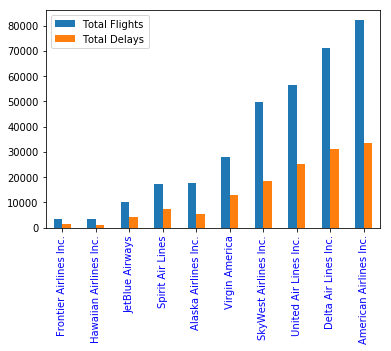

In [163]:
total_airline_delay=total_airline_delay.sort_values('Total Flights',ascending=True)
total_airline_delay
total_airline_delay.plot.bar()
plt.xticks(x, total_airline_delay["Airline"], rotation="vertical",color='b')
plt.show()